In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import re 
from operator import itemgetter
import warnings
from scipy.integrate import solve_ivp
from scipy import optimize
import seaborn as sns
import PyCCELL_PRFQT as px

C:\Users\nessl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [101]:
def endpoint(df):
    end_point = pd.DataFrame(df.max(axis=0))
    end_point = end_point.T
    end_point= end_point.drop(columns=[i for i in end_point.columns if 'Time'in i or'NC'in i or'std' in i])
    return end_point

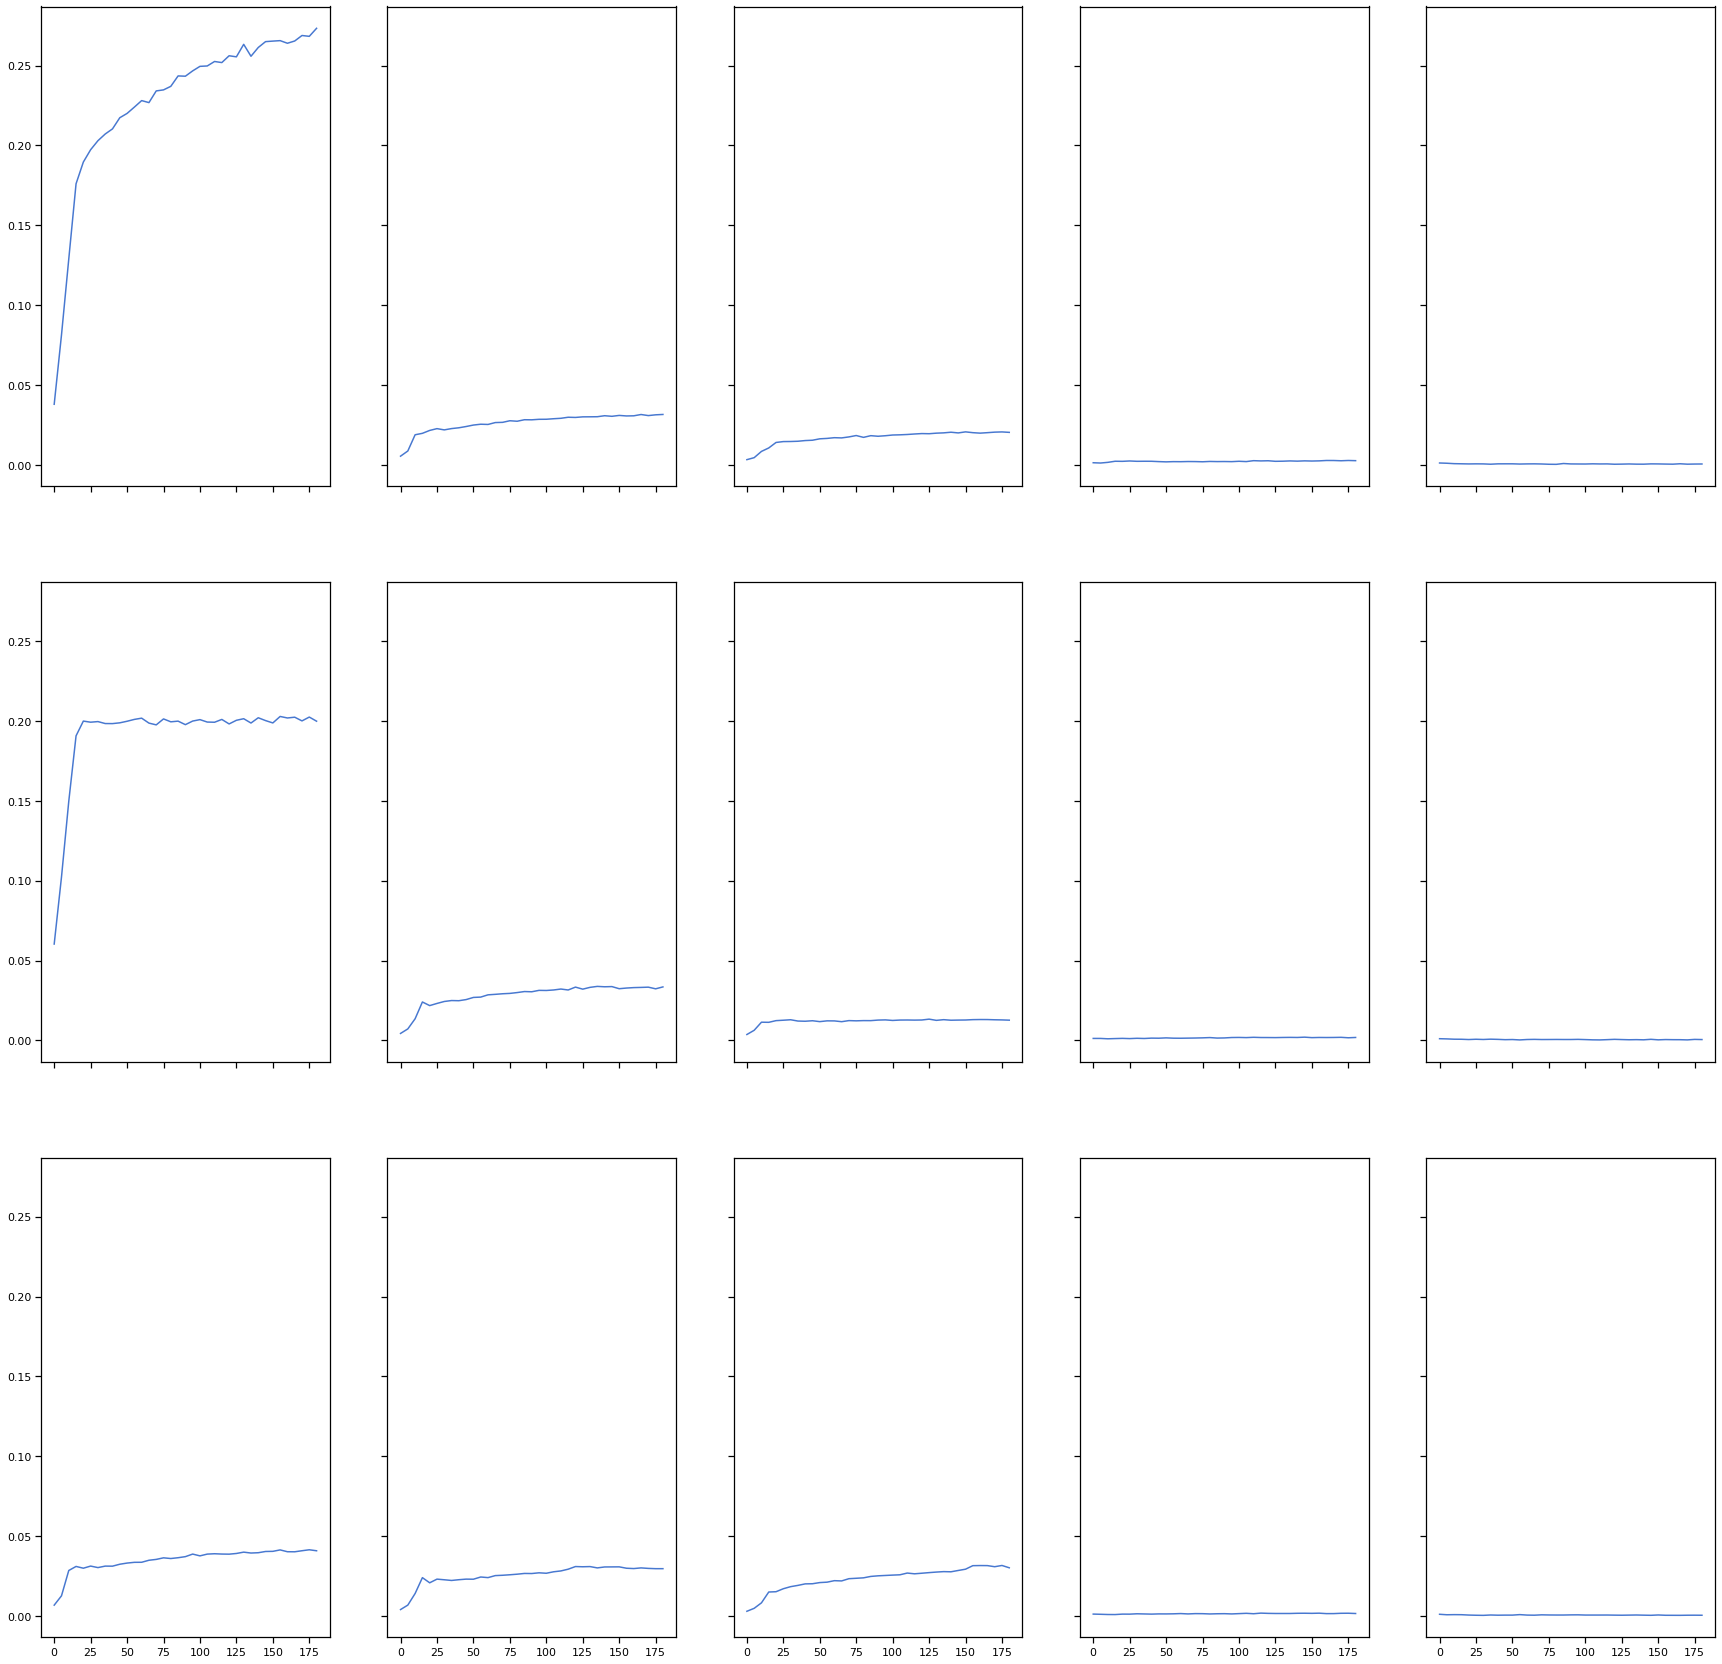

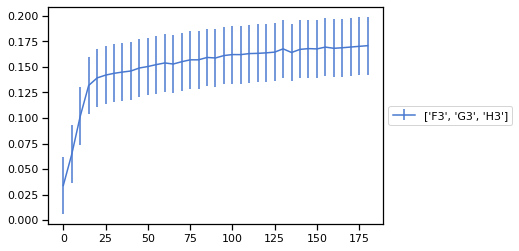

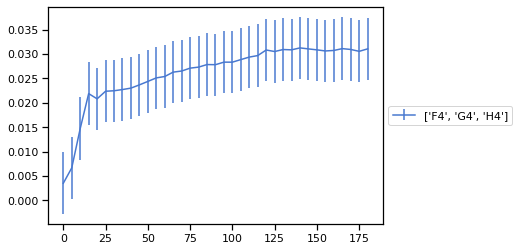

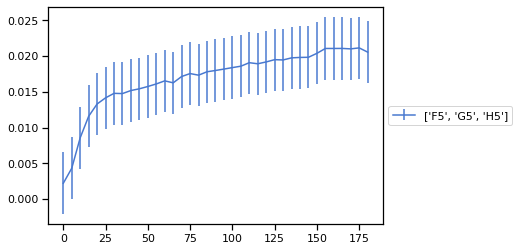

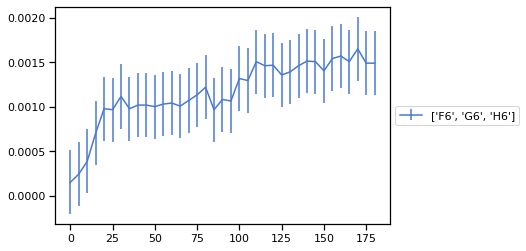

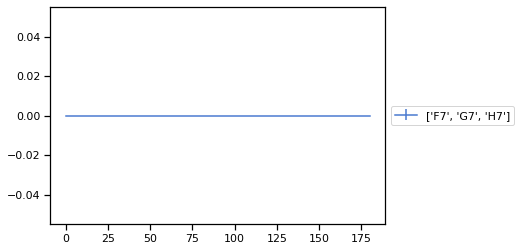

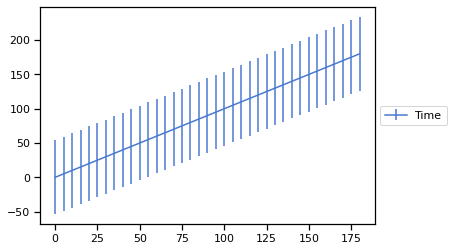

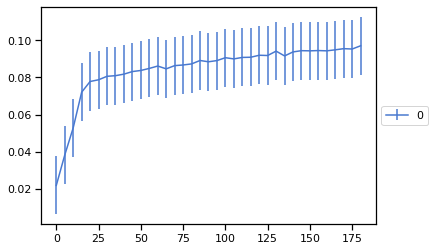

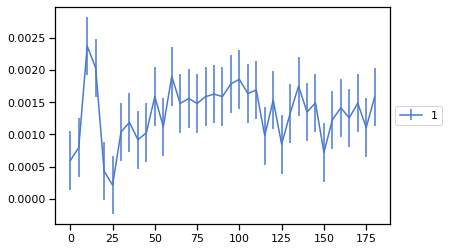

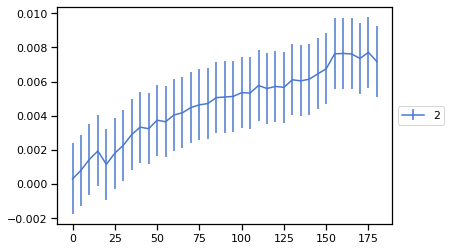

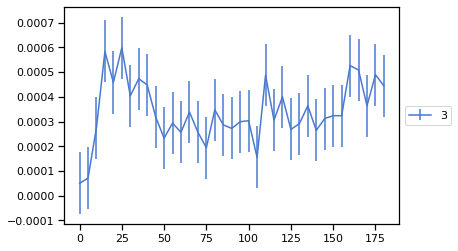

In [105]:
test = px.main('results/SHERLOCK/1st_try_probe_dilution/sherlock_probe_concentr_2.xlsx'
               ,70,"YES",3,5,'col',['F7','G7','H7'],"NO")


In [106]:
test.rename(columns={"['F3', 'G3', 'H3']": '2µM_P_Cold',
                   "['F4', 'G4', 'H4']": '2µM_P',
                     "['F5', 'G5', 'H5']":'1µM_P' ,
                     "['F6', 'G6', 'H6']": '0.1µM_P',
                    "['F7', 'G7', 'H7']": 'NC_wt_cas',
                     0: '2µM_P_Cold_std',
                   1: '2µM_P_std',
                     2:'1µM_P_std' ,
                     3: '0.1µM_P_std',
                    4: 'NC_wt_cas_std'},
          inplace=True, errors='raise')

test.head()

,2µM_P_Cold,2µM_P,1µM_P,0.1µM_P,NC_wt_cas,Time,2µM_P_Cold_std,2µM_P_std,1µM_P_std,0.1µM_P_std,NC_wt_cas_std
0,0.033913,0.003507,0.002200,0.000150,0.0,0,0.021953,0.000595,0.000305,0.000050,0.000041
1,0.064480,0.006657,0.004302,0.000242,0.0,5,0.038277,0.000797,0.000808,0.000071,0.000096
2,0.101565,0.014708,0.008569,0.000386,0.0,10,0.052915,0.002371,0.001451,0.000275,0.000045
3,0.131844,0.021871,0.011575,0.000703,0.0,15,0.072056,0.002032,0.001939,0.000584,0.000064
4,0.139244,0.020806,0.013297,0.000979,0.0,20,0.077820,0.000433,0.001154,0.000458,0.000014


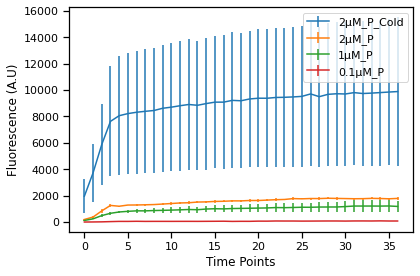

In [10]:
sns.set_context("notebook")
test[['2µM_P_Cold','2µM_P','1µM_P','0.1µM_P']].plot(yerr=[test['2µM_P_Cold_std'],
                                                          test['2µM_P_std'],
                                                          test['1µM_P_std'],
                                                          test['0.1µM_P_std']])
plt.legend()
plt.ylabel("Fluorescence (A.U)")
plt.xlabel("Time Points")
plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()

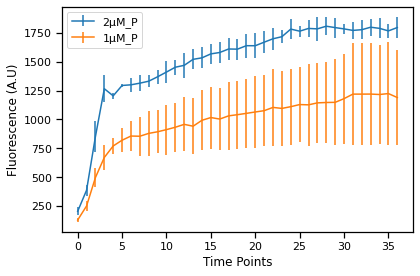

In [11]:
test[['2µM_P','1µM_P']].plot(yerr=[test['2µM_P_std'],test['1µM_P_std']])
plt.legend()
plt.ylabel("Fluorescence (A.U)")
plt.xlabel("Time Points")
plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()

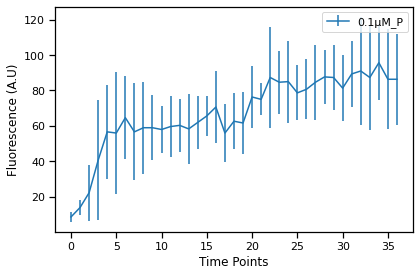

In [12]:
test[['0.1µM_P']].plot(yerr=test['0.1µM_P_std'])
plt.ylabel("Fluorescence (A.U)")
plt.xlabel("Time Points")
plt.legend()
plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt3.png",dpi=300)
plt.show()

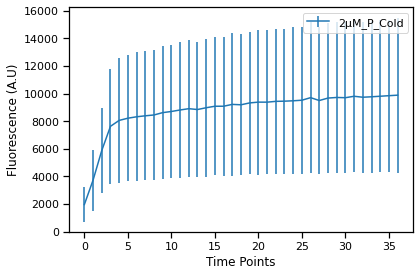

In [13]:
test[['2µM_P_Cold']].plot(yerr=test['2µM_P_Cold_std'])
plt.ylabel("Fluorescence (A.U)")
plt.xlabel("Time Points")
plt.legend()
plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt4.png",dpi=300)
plt.show()

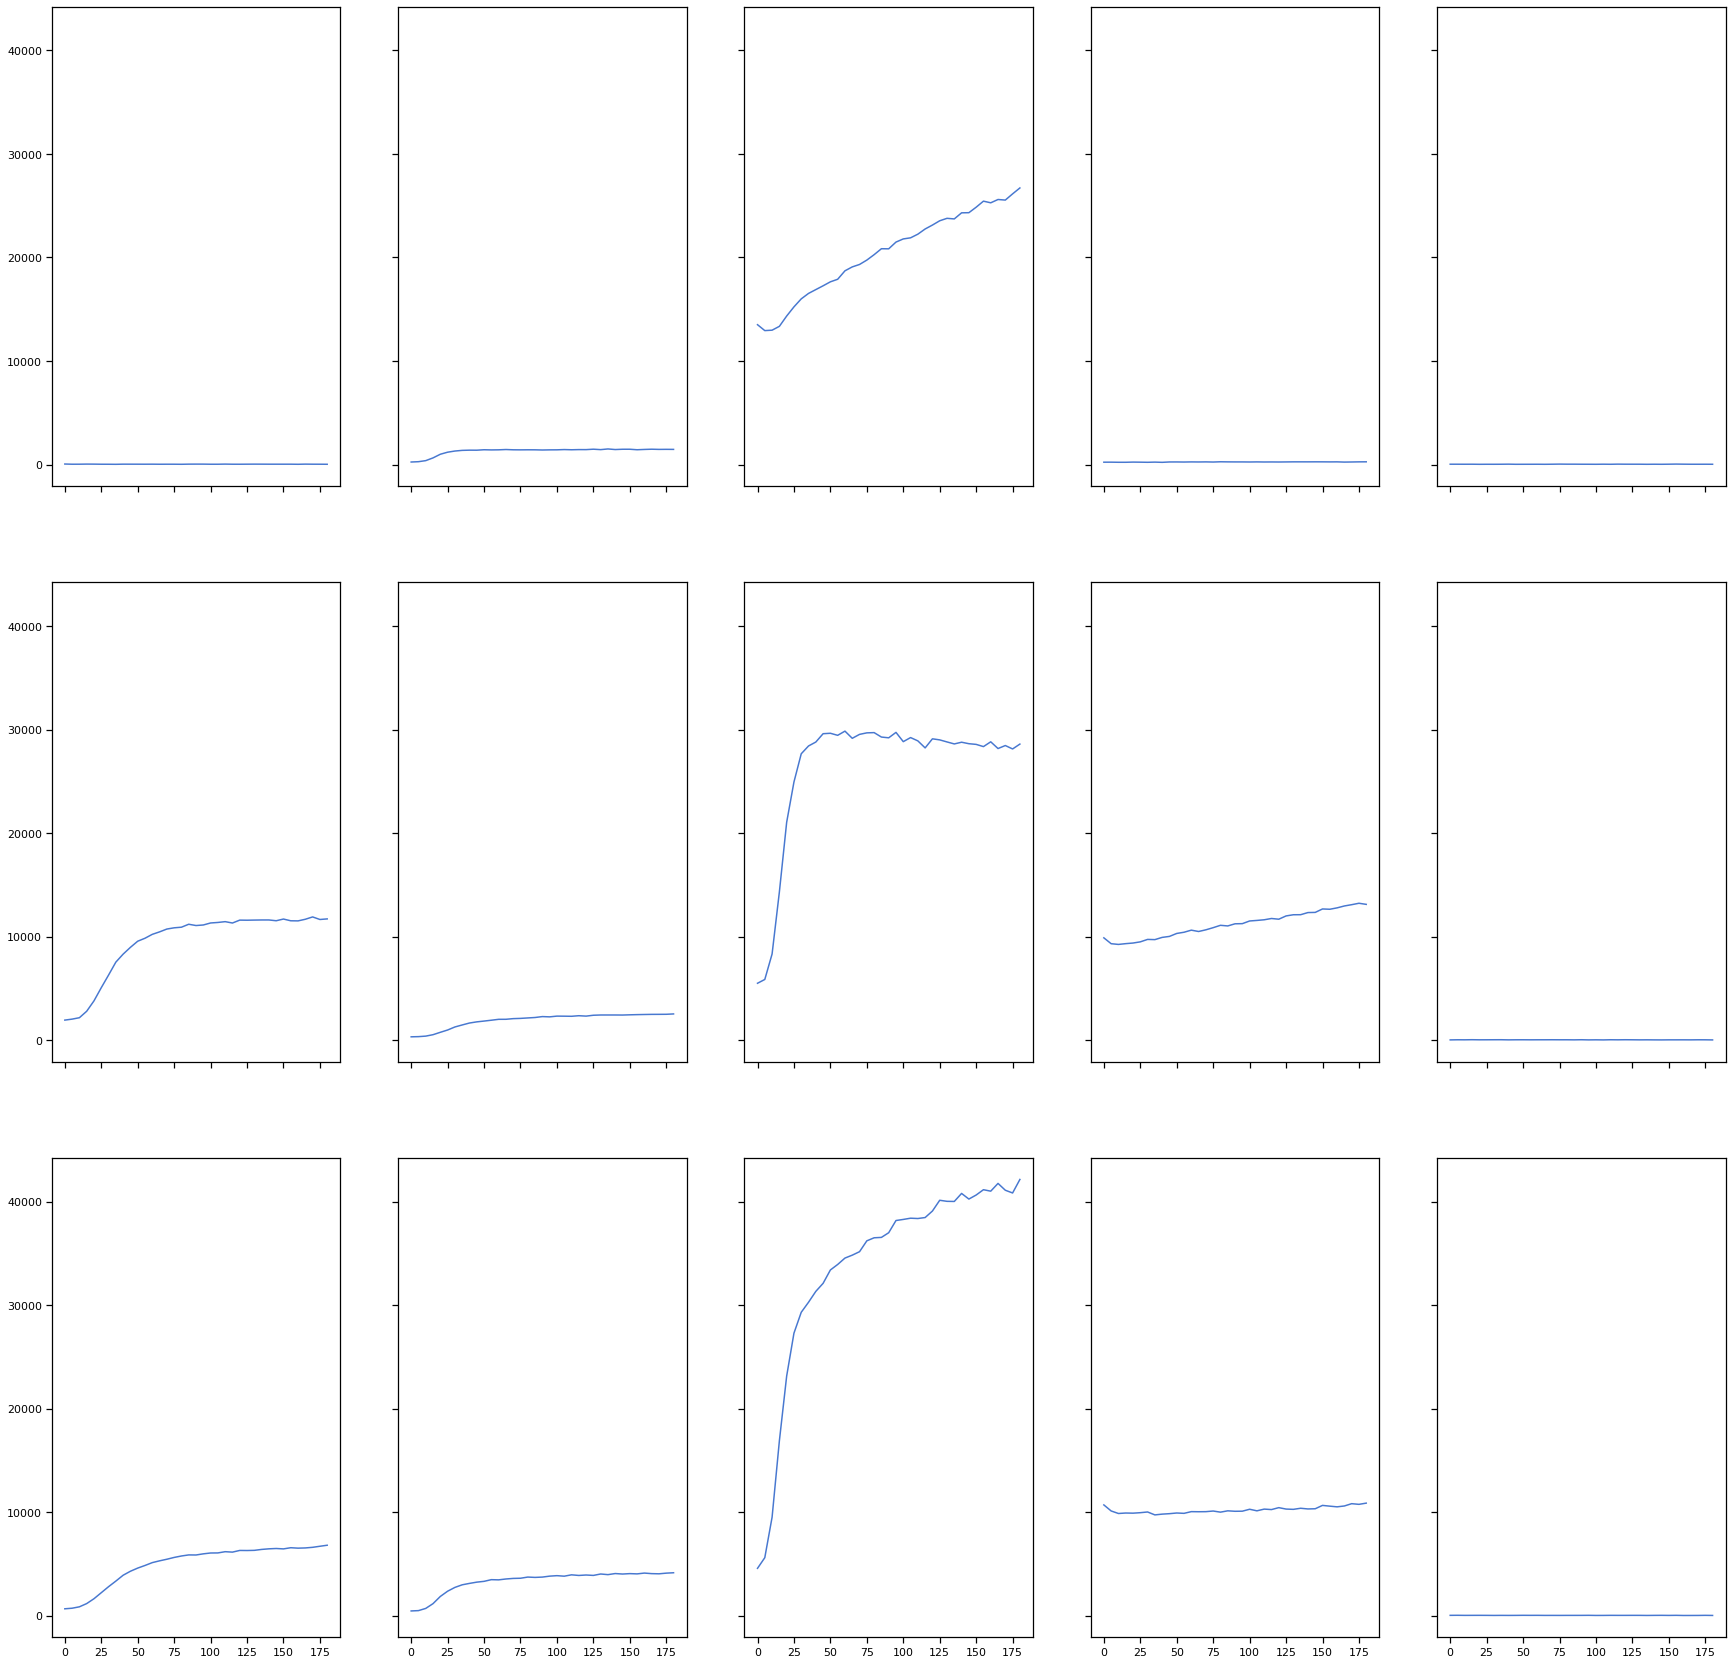

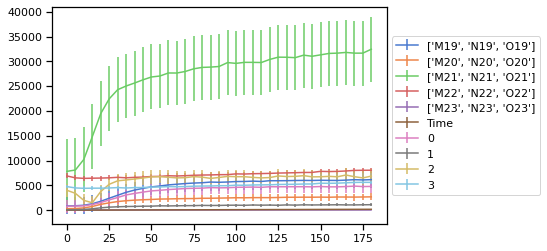

In [107]:
test_2 = px.main('results/SHERLOCK/1st_try_probe_dilution/first_sherlock_probe_concentr_modif.xlsx',50
            ,"NO",3,5,'col',['M23', 'N23', 'O23'],"YES")

In [108]:
test_2=test_2/57884

In [15]:
test_2.columns

Index(['['M19', 'N19', 'O19']', '['M20', 'N20', 'O20']',
       '['M21', 'N21', 'O21']', '['M22', 'N22', 'O22']',
       '['M23', 'N23', 'O23']',                  'Time',
                             0,                       1,
                             2,                       3,
                             4],
      dtype='object')

In [109]:
test_2.rename(columns={"['M19', 'N19', 'O19']": '2µM_P', "['M20', 'N20', 'O20']":'1µM_P',
       "['M21', 'N21', 'O21']": '0.1µM_P', "['M22', 'N22', 'O22']":'experimental_error',
       "['M23', 'N23', 'O23']": 'NC_wt_cas',0: '2µM_P_std',
                   1: '1µM_P_std',
                     2:'0.1µM_P_std' ,
                     3: 'xperimental_error_std',
                    4: 'NC_wt_cas_std'},
          inplace=True, errors='raise')

test_2.head()

,2µM_P,1µM_P,0.1µM_P,experimental_error,NC_wt_cas,Time,2µM_P_std,1µM_P_std,0.1µM_P_std,xperimental_error_std,NC_wt_cas_std
0,0.014748,0.005379,0.135201,0.119267,0.0,0.000000,0.013535,0.001532,0.069299,0.082120,0.000099
1,0.015416,0.005747,0.139866,0.112570,0.0,0.000086,0.014298,0.001563,0.058684,0.077429,0.000059
2,0.017063,0.007924,0.176813,0.110779,0.0,0.000173,0.015150,0.002619,0.034124,0.076153,0.000014
3,0.022436,0.012819,0.255828,0.111384,0.0,0.000259,0.019456,0.004804,0.025804,0.076625,0.000067
4,0.030970,0.020253,0.336368,0.111833,0.0,0.000346,0.026544,0.008182,0.064789,0.076643,0.000085


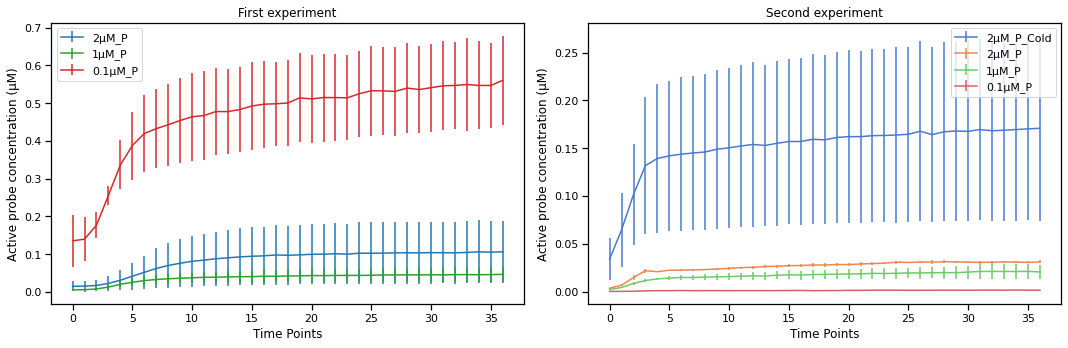

In [111]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)

sns.set_context("notebook")
test[['2µM_P_Cold','2µM_P','1µM_P','0.1µM_P']].plot(yerr=[test['2µM_P_Cold_std'],
                                                          test['2µM_P_std'],
                                                          test['1µM_P_std'],
                                                          test['0.1µM_P_std']],ax=ax[1])
test_2[['2µM_P','1µM_P','0.1µM_P']].plot(yerr=[test_2['2µM_P_std'],test_2['1µM_P_std'],test_2['0.1µM_P_std']],ax=ax[0],color=['tab:blue','tab:green','tab:red'])
ax[0].set_title('First experiment')
ax[1].set_title('Second experiment')

for ax in ax:
    
    ax.legend()
    ax.set_ylabel("Active probe concentration (µM)")
    ax.set_xlabel("Time Points")
    



plt.tight_layout()
plt.savefig("images/SHERLOCK/probe_dilution.png",dpi=300)
plt.show()


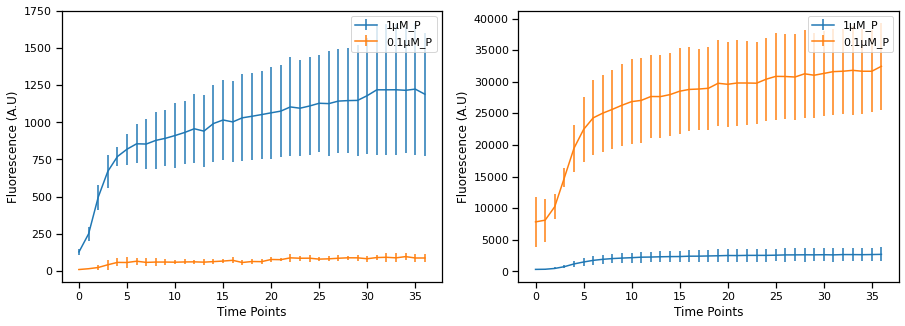

In [21]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)

sns.set_context("notebook")
test[['1µM_P','0.1µM_P']].plot(yerr=[test['1µM_P_std'],test['0.1µM_P_std']],ax=ax[0])
test_2[['1µM_P','0.1µM_P']].plot(yerr=[test_2['1µM_P_std'],test_2['0.1µM_P_std']],ax=ax[1])

for ax in ax:
    
    ax.legend()
    ax.set_ylabel("Fluorescence (A.U)")
    ax.set_xlabel("Time Points")
    
#plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()


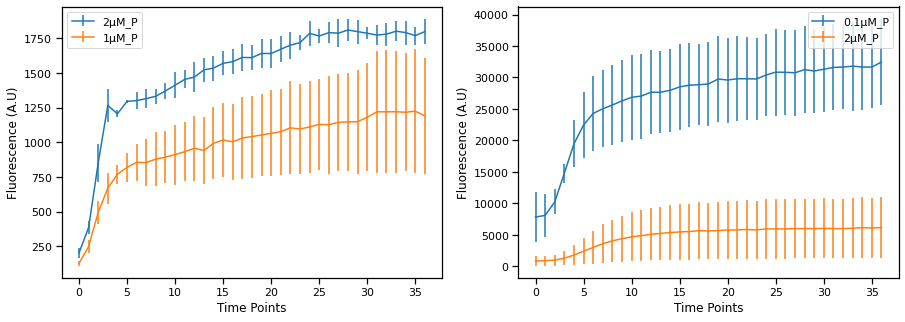

In [24]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)

sns.set_context("notebook")
test[['2µM_P','1µM_P']].plot(yerr=[test['2µM_P_std'],test['1µM_P_std']],ax=ax[0])
test_2[['0.1µM_P','2µM_P']].plot(yerr=[test_2['0.1µM_P_std'],test_2['2µM_P_std']],ax=ax[1])

for ax in ax:
    
    ax.legend()
    ax.set_ylabel("Fluorescence (A.U)")
    ax.set_xlabel("Time Points")
    
#plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()

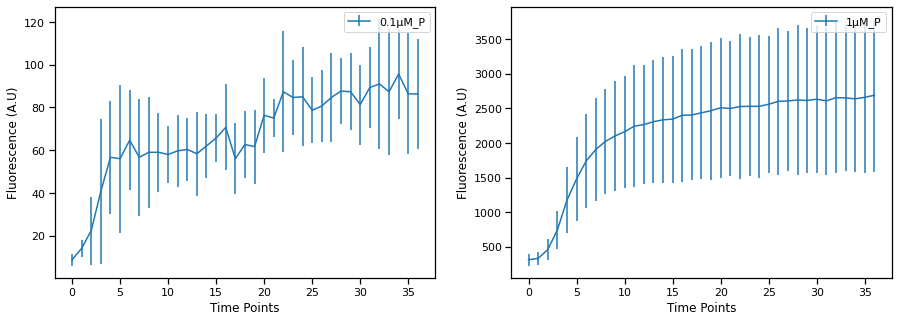

In [25]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)

sns.set_context("notebook")
test[['0.1µM_P']].plot(yerr=[test['0.1µM_P_std']],ax=ax[0])
test_2[['1µM_P']].plot(yerr=[test_2['1µM_P_std']],ax=ax[1])

for ax in ax:
    
    ax.legend()
    ax.set_ylabel("Fluorescence (A.U)")
    ax.set_xlabel("Time Points")
    
#plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()

## Endpoint plots

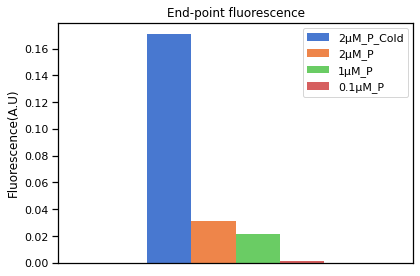

In [113]:
end_point = endpoint(test)
sns.set_context("notebook")
sns.set_palette("muted")

end_point.plot(kind="bar")
plt.legend()
plt.xticks([])
plt.ylabel("Fluorescence(A.U)")
plt.title("End-point fluorescence")
plt.tight_layout()
plt.savefig("images/SHERLOCK/end_point_probes.png",dpi=300)
plt.show()

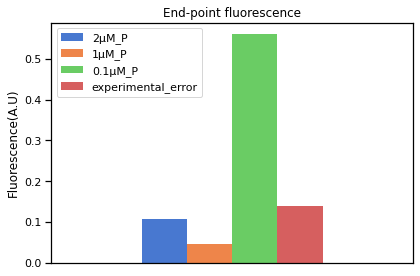

In [114]:
end_point = endpoint(test_2)

sns.set_context("notebook")
sns.set_palette("muted")

end_point.plot(kind="bar")
plt.legend()
plt.xticks([])
plt.ylabel("Fluorescence(A.U)")
plt.title("End-point fluorescence")
plt.tight_layout()
plt.savefig("images/SHERLOCK/end_point_probes_V1.png",dpi=300)
plt.show()
